In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

input_mat = pd.read_csv("C:/Users/User/Desktop/a.csv")

test_mat = input_mat[['AMOUNT']]
input_mat = input_mat[['PR']]


In [17]:
xbuf = []
firstRun = True

def MovAvgFilter_batch(x):
    global n, xbuf, firstRun
    if firstRun:
        n = 2
        xbuf = x * np.ones(n)
        firstRun = False
    else:
        for i in range(n-1):
            xbuf[i] = xbuf[i+1]
        xbuf[n-1] = x
    avg = np.sum(xbuf) / n
    return avg

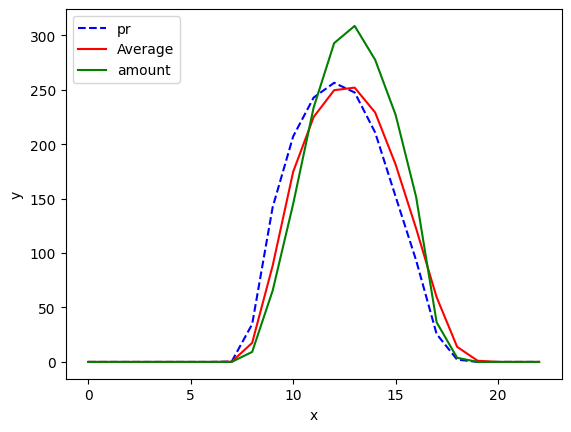

In [19]:
y1 = input_mat.iloc[:,[0]] 
x1 = np.zeros(shape= len(input_mat))
y1 = y1.to_numpy()

y2 = np.ravel(y1,order = 'c')
x2 = np.ravel(x1,order ='c')


first = True
for i in range(len(y2)):
    if first == True:
        Count = np.array([0])
        a = MovAvgFilter_batch(y2[i])
        first = False
    else:
        a = np.append(a,np.array(MovAvgFilter_batch(y2[i])))
        Count = np.append(Count, np.array([i]))
        i +=1
    


plt.plot(Count, y2, 'b--', label='pr')
plt.plot(Count, a, 'r', label='Average')
plt.plot(Count, test_mat, 'g', label = 'amount')
plt.legend(loc='upper left')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

a = pd.DataFrame(a)
a.to_csv("C:/Users/User/Desktop/c.csv", index=False)